## Time Series Mini Project

The goal of this project is to discover trends in weather data from a Kaggle dataset and to forecast future temperature values. 

I chose the state of Texas to analyze, with 2325 observations from the years 1820 to 2013. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import prepare
from datetime import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt
from pandas.plotting import register_matplotlib_converters
import statsmodels.api as sm
from statsmodels.tsa.api import Holt

In [2]:
df = pd.read_csv('landtemp_state.csv')

In [3]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [4]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645675 entries, 0 to 645674
Data columns (total 5 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             645675 non-null  object 
 1   AverageTemperature             620027 non-null  float64
 2   AverageTemperatureUncertainty  620027 non-null  float64
 3   State                          645675 non-null  object 
 4   Country                        645675 non-null  object 
dtypes: float64(2), object(3)
memory usage: 24.6+ MB


In [5]:
df = df.dropna()

In [6]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [7]:
df.columns = df.columns.str.lower()

In [8]:
df.head()

,dt,averagetemperature,averagetemperatureuncertainty,state,country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [9]:
df = df.rename(columns={'averagetemperature':'avg_temp', 'averagetemperatureuncertainty':'avg_temp_uncertain'})

In [10]:
df.head()

,dt,avg_temp,avg_temp_uncertain,state,country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [11]:
df.avg_temp = (df.avg_temp * 1.8) + 32

In [12]:
df.dt[0]

'1855-05-01'

In [13]:
df.dt.min()

'1743-11-01'

In [14]:
df.dt.max()

'2013-09-01'

In [15]:
df.dt = pd.to_datetime(df.dt)

In [16]:
df = df.set_index('dt').sort_index()

In [17]:
df

,avg_temp,avg_temp_uncertain,state,country
dt,,,,
1743-11-01,30.5042,3.427,Wisconsin,United States
1743-11-01,42.7154,2.220,Maryland,United States
1743-11-01,28.2056,2.507,Novgorod,Russia
1743-11-01,21.7256,4.134,Tatarstan,Russia
1743-11-01,20.8238,3.532,Murmansk,Russia
...,...,...,...,...
2013-09-01,57.0902,1.562,New Brunswick,Canada
2013-09-01,57.3674,1.212,Maine,United States
2013-09-01,62.2526,0.981,Minnesota,United States


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 620027 entries, 1743-11-01 to 2013-09-01
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   avg_temp            620027 non-null  float64
 1   avg_temp_uncertain  620027 non-null  float64
 2   state               620027 non-null  object 
 3   country             620027 non-null  object 
dtypes: float64(2), object(2)
memory usage: 23.7+ MB


array([[<AxesSubplot:title={'center':'avg_temp'}>,
        <AxesSubplot:title={'center':'avg_temp_uncertain'}>]],
      dtype=object)

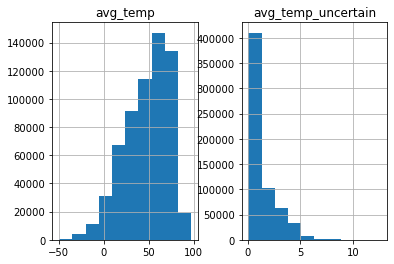

In [19]:
df.hist()

In [20]:
df_us = df[df.country=='United States']

array([[<AxesSubplot:title={'center':'avg_temp'}>,
        <AxesSubplot:title={'center':'avg_temp_uncertain'}>]],
      dtype=object)

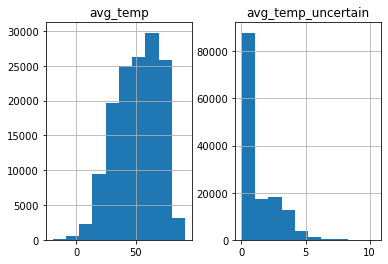

In [21]:
df_us.hist()

In [22]:
df_us.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 141930 entries, 1743-11-01 to 2013-09-01
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   avg_temp            141930 non-null  float64
 1   avg_temp_uncertain  141930 non-null  float64
 2   state               141930 non-null  object 
 3   country             141930 non-null  object 
dtypes: float64(2), object(2)
memory usage: 5.4+ MB


In [23]:
df_us.state.value_counts()

Wisconsin               3141
Michigan                3141
Minnesota               3141
Illinois                3141
Iowa                    3141
Ohio                    3119
Connecticut             3119
Tennessee               3119
Rhode Island            3119
Maryland                3119
South Carolina          3119
Virginia                3119
Maine                   3119
District Of Columbia    3119
West Virginia           3119
North Carolina          3119
Georgia (State)         3119
Indiana                 3119
Delaware                3119
Kentucky                3119
New York                3119
Vermont                 3119
Missouri                3119
Pennsylvania            3119
Massachusetts           3119
New Jersey              3119
Alabama                 3119
New Hampshire           3119
Florida                 3093
Arkansas                2909
Mississippi             2909
Louisiana               2507
North Dakota            2504
Nebraska                2504
South Dakota  

In [24]:
texas = df_us[df_us.state=='Texas']

array([[<AxesSubplot:title={'center':'avg_temp'}>,
        <AxesSubplot:title={'center':'avg_temp_uncertain'}>]],
      dtype=object)

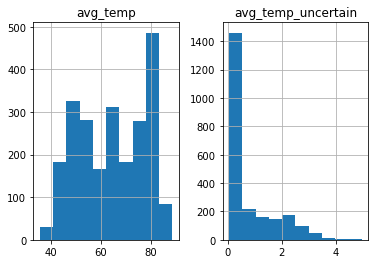

In [25]:
texas.hist()

In [26]:
texas.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2325 entries, 1820-01-01 to 2013-09-01
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   avg_temp            2325 non-null   float64
 1   avg_temp_uncertain  2325 non-null   float64
 2   state               2325 non-null   object 
 3   country             2325 non-null   object 
dtypes: float64(2), object(2)
memory usage: 90.8+ KB


In [27]:
texas.index.max()

Timestamp('2013-09-01 00:00:00')

In [28]:
texas.index.min()

Timestamp('1820-01-01 00:00:00')

In [29]:
texas = texas.avg_temp.resample('m').mean()

In [30]:
texas = pd.DataFrame(texas)

In [31]:
texas = (texas['1820':'2012'])

In [32]:
texas.index.max()

Timestamp('2012-12-31 00:00:00', freq='M')

In [33]:
train_size = int(len(texas) * 0.5)

In [34]:
validate_size = int(len(texas) * 0.3)

In [35]:
test_size = int(len(texas) - train_size - validate_size)

In [36]:
len(texas) == train_size + validate_size + test_size

True

In [37]:
validate_end_index = train_size + validate_size

In [38]:
train = texas[:train_size]

In [39]:
validate = texas[train_size:validate_end_index]

In [40]:
test = texas[validate_end_index:]

In [41]:
train.size, validate.size, test.size

(1158, 694, 464)

In [42]:
texas.size == train.size + validate.size + test.size

True

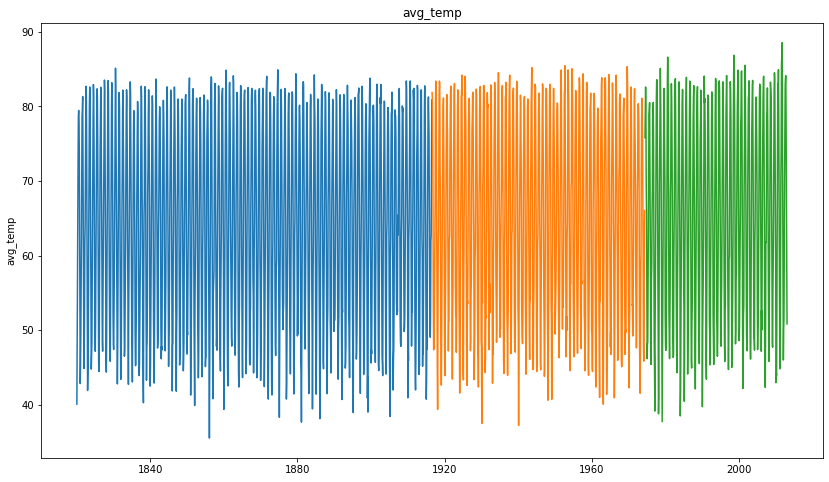

In [43]:
for col in texas.columns:
    plt.figure(figsize=(14,8))
    plt.plot(train[col])
    plt.plot(validate[col])
    plt.plot(test[col])
    plt.ylabel(col)
    plt.title(col)
    plt.show()

<AxesSubplot:xlabel='dt'>

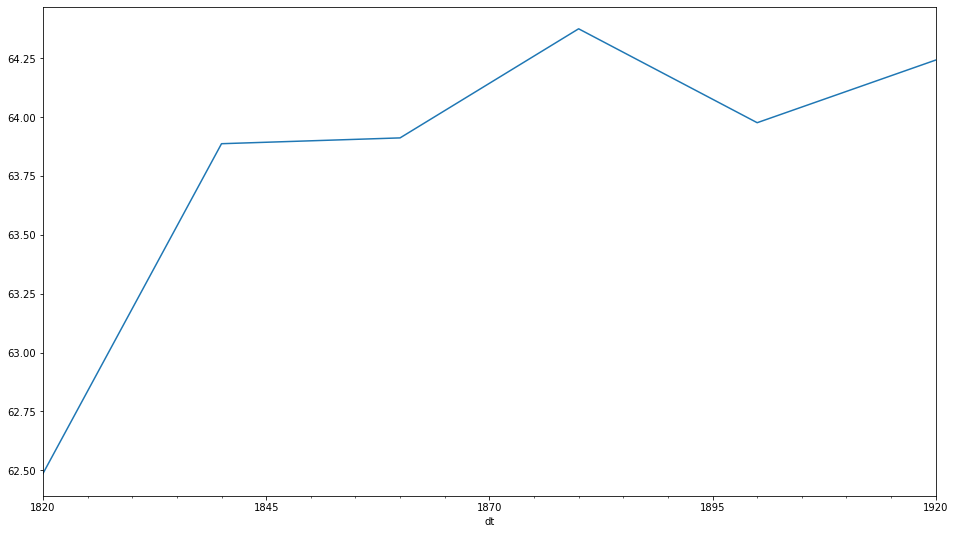

In [44]:
plt.figure(figsize=[16,9])
train.avg_temp.resample('20y').mean().plot()

In [45]:
def evaluate(target_var):
    '''
    This function will take the actual values of the target_var from validate, 
    and the predicted values stored in yhat_df, 
    and compute the rmse, rounding to 0 decimal places. 
    it will return the rmse. 
    '''
    rmse = round(mean_squared_error(validate[target_var], yhat_df[target_var], squared=False), 0)
    return rmse


In [46]:
def plot_and_eval(target_var):
    '''
    This function takes in the target var name (string), and returns a plot
    of the values of train for that variable, validate, and the predicted values from yhat_df. 
    it will als lable the rmse. 
    '''
    plt.figure(figsize = (12,4))
    plt.plot(train[target_var], label='Train', linewidth=1)
    plt.plot(validate[target_var], label='Validate', linewidth=1)
    plt.plot(yhat_df[target_var])
    plt.title(target_var)
    rmse = evaluate(target_var)
    print(target_var, '-- RMSE: {:.0f}'.format(rmse))
    plt.show()

In [47]:
# create an empty dataframe
eval_df = pd.DataFrame(
    columns=['model_type', 'target_var', 'rmse'])
eval_df

,model_type,target_var,rmse


In [48]:
# function to store the rmse so that we can compare
def append_eval_df(model_type, target_var):
    '''
    this function takes in as arguments the type of model run, and the name of the target variable. 
    It returns the eval_df with the rmse appended to it for that model and target_var. 
    '''
    rmse = evaluate(target_var)
    d = {'model_type': [model_type], 'target_var': [target_var],
        'rmse': [rmse]}
    d = pd.DataFrame(d)
    return eval_df.append(d, ignore_index = True)


In [49]:
temp = train['avg_temp'][-1:][0]

In [50]:
yhat_df = pd.DataFrame(
{
    'avg_temp': [temp]},
    index=validate.index
)
yhat_df.head()

,avg_temp
dt,
1916-07-31,80.8412
1916-08-31,80.8412
1916-09-30,80.8412
1916-10-31,80.8412
1916-11-30,80.8412


avg_temp -- RMSE: 21


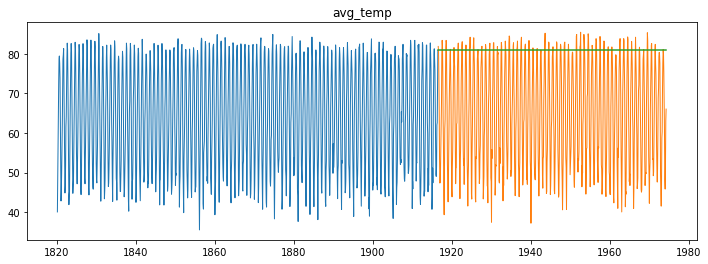

In [51]:
plot_and_eval('avg_temp')

In [52]:
for col in train.columns:
    eval_df = append_eval_df(model_type='last_observed_value',
                            target_var = col)
eval_df

/var/folders/5g/xrhpsnj56_v3scw9s4trbgxc0000gn/T/ipykernel_8812/1407114492.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


,model_type,target_var,rmse
0,last_observed_value,avg_temp,21.0


In [53]:
temp = train['avg_temp'].mean()

In [54]:
def make_predictions(temp=None):
    yhat_df = pd.DataFrame({'avg_temp': [temp]},
                          index=validate.index)
    return yhat_df

In [55]:
yhat_df = make_predictions(temp)

In [56]:
yhat_df.head(3)

,avg_temp
dt,
1916-07-31,64.053394
1916-08-31,64.053394
1916-09-30,64.053394


avg_temp -- RMSE: 13


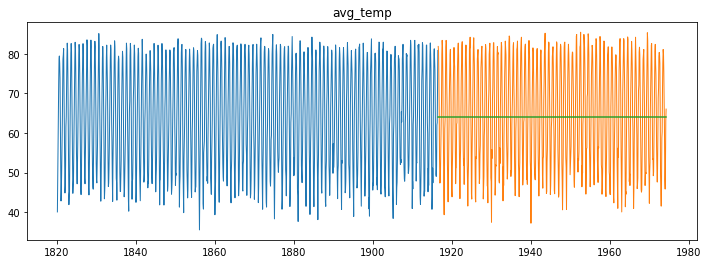

In [57]:
for col in train.columns:
    plot_and_eval(col)

In [58]:
for col in train.columns:
    eval_df = append_eval_df(model_type='simple_average', 
                            target_var = col)
eval_df

/var/folders/5g/xrhpsnj56_v3scw9s4trbgxc0000gn/T/ipykernel_8812/1407114492.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


,model_type,target_var,rmse
0,last_observed_value,avg_temp,21.0
1,simple_average,avg_temp,13.0


In [59]:
period = 36

# take 30 day rolling average, then take the last element and that will the one that propogates 
# forward as our prediction. 
temp = round(train['avg_temp'].rolling(period).mean()[-1], 2)
print(temp)

64.32


In [60]:
yhat_df = make_predictions(temp)
yhat_df.head()

,avg_temp
dt,
1916-07-31,64.32
1916-08-31,64.32
1916-09-30,64.32
1916-10-31,64.32
1916-11-30,64.32


avg_temp -- RMSE: 13


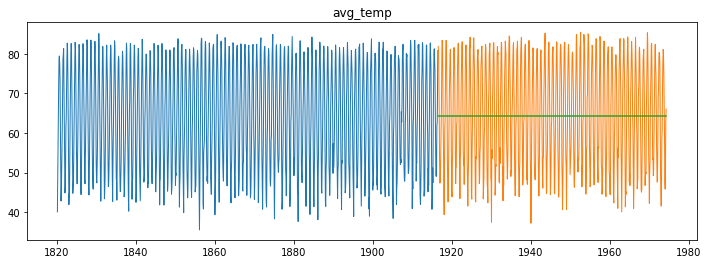

In [61]:
for col in train.columns:
    plot_and_eval(col)

In [62]:
for col in train.columns:
    eval_df = append_eval_df(model_type = '3y_moving_avg', 
                            target_var = col)

eval_df

/var/folders/5g/xrhpsnj56_v3scw9s4trbgxc0000gn/T/ipykernel_8812/1407114492.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


,model_type,target_var,rmse
0,last_observed_value,avg_temp,21.0
1,simple_average,avg_temp,13.0
2,3y_moving_avg,avg_temp,13.0


In [63]:
periods = [12, 24, 60, 440]

for p in periods: 
    temp = train['avg_temp'].rolling(p).mean()[-1]
    yhat_df = make_predictions(temp)
    model_type = str(p) + '_month_moving_avg'
    for col in train.columns:
        eval_df = append_eval_df(model_type = model_type,
                                target_var = col)

/var/folders/5g/xrhpsnj56_v3scw9s4trbgxc0000gn/T/ipykernel_8812/1407114492.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)
/var/folders/5g/xrhpsnj56_v3scw9s4trbgxc0000gn/T/ipykernel_8812/1407114492.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)
/var/folders/5g/xrhpsnj56_v3scw9s4trbgxc0000gn/T/ipykernel_8812/1407114492.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)
/var/folders/5g/xrhpsnj56_v3scw9s4trbgxc0000gn/T/ipykernel_8812/1407114492.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inste

In [64]:
eval_df

,model_type,target_var,rmse
0,last_observed_value,avg_temp,21.0
1,simple_average,avg_temp,13.0
2,3y_moving_avg,avg_temp,13.0
3,12_month_moving_avg,avg_temp,13.0
4,24_month_moving_avg,avg_temp,13.0
5,60_month_moving_avg,avg_temp,13.0
6,440_month_moving_avg,avg_temp,13.0


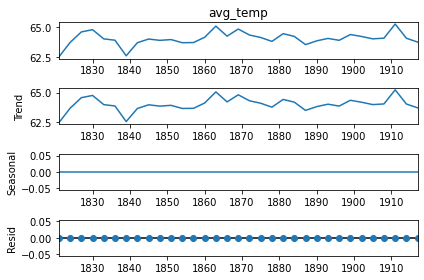

In [65]:
sm.tsa.seasonal_decompose(train[col].resample('3y').mean()).plot()
plt.show()

In [66]:
col = 'avg_temp' 
# create our Holt's Object
model = Holt(train[col], exponential=False, damped_trend=True)

In [67]:
model = model.fit(optimized=True)

In [68]:
yhat_items = model.predict(start = validate.index[0],
                              end = validate.index[-1])

In [69]:
for col in train.columns:
    model = Holt(train[col], exponential=False)
    model = model.fit(smoothing_level = .1, 
                      smoothing_trend = .1, 
                      optimized = True)
    yhat_items = model.predict(start = validate.index[0],
                              end = validate.index[-1])
    yhat_df[col] = round(yhat_items, 2)

avg_temp -- RMSE: 49


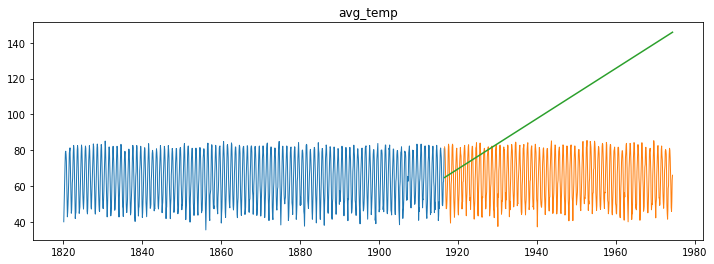

In [70]:
for col in train.columns:
    plot_and_eval(target_var = col)

In [95]:
train = texas.loc[:'2009']
test = texas.loc['2010':'2012']

print(train.shape)
print(test.shape)

train.head()
train.tail()


(2280, 1)
(36, 1)


,avg_temp
dt,
2009-08-31,83.6366
2009-09-30,74.5826
2009-10-31,64.1552
2009-11-30,57.4628
2009-12-31,42.9620


In [96]:
test.head()

,avg_temp
dt,
2010-01-31,44.1464
2010-02-28,43.8962
2010-03-31,54.9338
2010-04-30,65.2226
2010-05-31,74.1344


In [97]:
pd.concat([train.tail(1), test.head(1)])

,avg_temp
dt,
2009-12-31,42.9620
2010-01-31,44.1464


In [98]:
train.diff(36).mean()

avg_temp    0.034623
dtype: float64

In [99]:
yhat_df = texas.loc['2007':'2009'] + train.diff(36).mean()

In [100]:
yhat_df

,avg_temp
dt,
2007-01-31,42.355823
2007-02-28,49.192223
2007-03-31,61.801223
2007-04-30,61.781423
2007-05-31,71.814623
2007-06-30,78.406223
2007-07-31,79.525823
2007-08-31,82.490423
2007-09-30,77.641223


In [101]:
yhat_df.index = test.index

<AxesSubplot:xlabel='dt'>

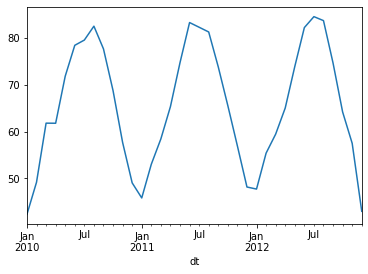

In [102]:
yhat_df.avg_temp.resample('m').mean().plot()

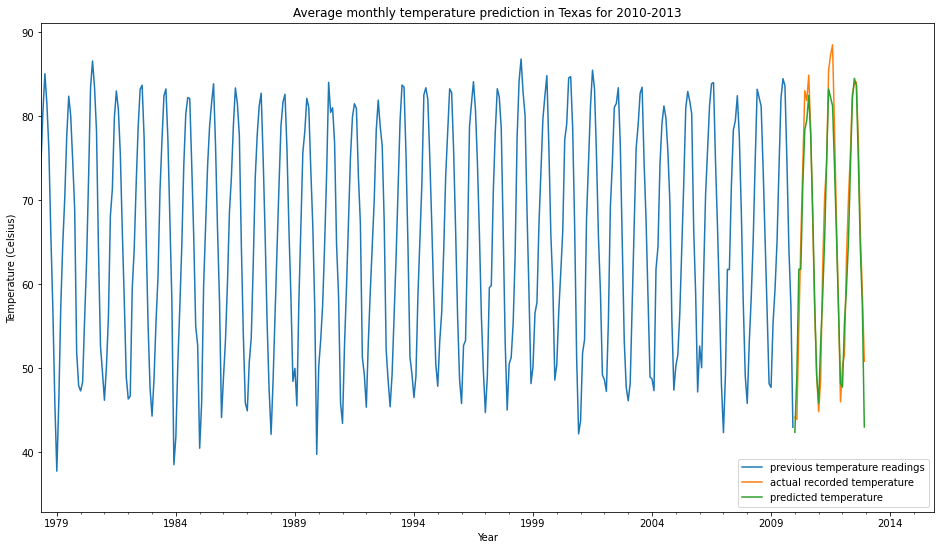

In [104]:
plt.figure(figsize=[16,9])
train.avg_temp.resample('m').mean().plot(label='previous temperature readings')
test.avg_temp.resample('m').mean().plot(label='actual recorded temperature')
yhat_df.avg_temp.resample('m').mean().plot(label='predicted temperature')
plt.xlim([100,550])
plt.xlabel('Year')
plt.ylabel('Temperature (Celsius)')
plt.title('Average monthly temperature prediction in Texas for 2010-2013')
plt.legend()

In [105]:
rmse_temp = sqrt(mean_squared_error(test['avg_temp'], 
                                       yhat_df['avg_temp']))

In [106]:
rmse_temp

3.482276241466225